In [1]:
import pandas as pd
import numpy as np
from tkinter import Tk
import os
import datetime
import xlsxwriter
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
opp = 1401

In [3]:
def read_excelfiles(extension):
    # Ask for directory
    # from tkinter.filedialog import askdirectory
    # path_files = askdirectory(title='Selecteer de map met alle ruwe input') # shows dialog box and return the path
    file_path = r"C:\Users\hnx\Desktop\Weesp"
    list_files = []

    for filename in os.listdir(file_path):
        if filename.endswith(extension):
            list_files.append(os.path.join(file_path, filename))
        else:
            continue

    return list_files

Lees data en maak onderscheid twee methodes


In [4]:
list_files = read_excelfiles(extension='csv')

In [5]:
# read csv files
dfs = [pd.read_csv(el, sep=',',index_col=[0], parse_dates=[0], decimal='.') for el in list_files]

df = pd.concat(dfs).sort_index()
df = df.max(level=0)

# Calculate flows
# df["Influentdebiet"] = np.where(df['7019 BC_A130_O'] == 1, df["7003 RGI_FTxyz_PW"]/2, df["7003 RGI_FTxyz_PW"])
df["Influentdebiet"] = df["7003 RGI_FTxyz_PW"]/2
df["Opstroomsnelheid"] = df["Influentdebiet"]/opp

# Onderscheid data in 2 methodes: compleet gebruik luchtkleppen 7019 BC_A130_D, incompleet gebruik waterhoogte 7009 AT_LT114_AM
df_compleet = df[df["7019 BC_A130_D"].notnull()]
df_incompleet1 = df[(df["7019 BC_A130_D"].isnull()) & (df["7009 AT_LT114_AM"].notnull())]
df_incompleet2 = df[(df["7019 BC_A151_D"].isnull()) & (df["7010 AT_LT114_AM"].notnull())]


Slibspiegelmeting

In [22]:
spiegel_loc = r"C:\Users\hnx\Desktop\Weesp\Slibspiegelmetingen\1787868_1_02-14-2021_13-10-15_03-16-2021_13-10-15.xlsx"
df_spiegel = pd.read_excel(spiegel_loc)

In [23]:
df_spiegel.set_index("Datum en tijd [lokaal]",drop=True,inplace=True)

In [24]:
df_spiegel = df_spiegel.dropna(how="all")

In [25]:
df_zonder = df_spiegel[(df_spiegel["SH"] > 1.5) & (df_spiegel["SH"] < 5.0)]

In [26]:
df_spiegel

,SH
Datum en tijd [lokaal],
2021-02-14 14:10:32,4.039068
2021-02-14 14:11:02,3.978034
2021-02-14 14:11:32,4.003119
2021-02-14 14:12:03,3.963600
2021-02-14 14:12:33,3.980055
...,...
2021-03-16 14:07:52,3.976283
2021-03-16 14:08:22,3.972607
2021-03-16 14:08:52,4.016848


In [27]:
def lin_regres(x, y):
    length = len(x)
    x_n = np.linspace(0, length/2, length)
    regr = linear_model.LinearRegression()
    regr.fit(x_n.reshape(-1, 1), y)
    y_pred = regr.predict(x_n.reshape(-1,1))
    return(regr, y_pred)

In [68]:
ranges = []
# ranges.append(["2020-12-21 03:46:00", "2020-12-21 04:12:00"])
# ranges.append(["2020-12-21 13:45:00", "2020-12-21 14:00:00"])
# ranges.append(["2020-12-21 18:48:00", "2020-12-21 19:05:00"])
# ranges.append(["2020-12-21 23:20:00", "2020-12-21 23:40:00"])
# ranges.append(["2020-12-22 03:23:00", "2020-12-22 03:45:00"])
# ranges.append(["2020-12-22 07:00:00", "2020-12-22 07:20:00"])
# ranges.append(["2020-12-24 17:29:00", "2020-12-24 17:53:00"])
# ranges.append(["2020-12-25 12:30:00", "2020-12-25 12:48:00"])
# ranges.append(["2020-12-26 17:23:00", "2020-12-26 17:43:00"])
# ranges.append(["2020-12-27 19:12:00", "2020-12-27 19:33:00"])
# ranges.append(["2020-12-22 03:23:00", "2020-12-22 03:45:00"])
# ranges.append(["2020-12-22 07:00:00", "2020-12-22 07:20:00"])

# ranges.append(["2020-12-28 05:47:00", "2020-12-28 06:14:00"])
# ranges.append(["2020-12-28 09:57:00", "2020-12-28 10:13:00"])
# ranges.append(["2020-12-28 22:04:00", "2020-12-28 22:25:00"])
# ranges.append(["2020-12-29 05:48:00", "2020-12-29 06:12:00"])
# ranges.append(["2020-12-29 10:08:00", "2020-12-29 10:31:00"])
# ranges.append(["2020-12-29 15:09:00", "2020-12-29 15:30:00"])
ranges.append(["2020-12-30 10:08:00", "2020-12-30 10:26:00"])
ranges.append(["2020-12-30 19:49:00", "2020-12-30 20:05:00"])
ranges.append(["2020-12-31 10:10:00", "2020-12-31 10:31:00"])
ranges.append(["2020-12-31 15:05:00", "2020-12-31 15:24:00"])
ranges.append(["2021-01-01 10:04:00", "2021-01-01 10:24:00"])
ranges.append(["2021-01-01 15:22:00", "2021-01-01 15:50:00"])
ranges.append(["2021-01-01 19:56:00", "2021-01-01 20:21:00"])
ranges.append(["2021-01-02 05:19:00", "2021-01-02 05:46:00"])
ranges.append(["2021-01-02 19:55:00", "2021-01-02 20:16:00"])
ranges.append(["2021-01-03 10:09:00", "2021-01-03 10:35:00"])
ranges.append(["2021-01-03 15:15:00", "2021-01-03 15:33:00"])
ranges.append(["2021-01-05 10:21:00", "2021-01-05 10:48:00"])
ranges.append(["2021-01-05 15:06:00", "2021-01-05 15:33:00"])
ranges.append(["2021-01-06 10:21:00", "2021-01-06 10:49:00"])
ranges.append(["2021-01-06 15:10:00", "2021-01-06 15:37:00"])
ranges.append(["2021-01-07 10:31:00", "2021-01-07 10:59:00"])
ranges.append(["2021-01-07 15:42:00", "2021-01-07 16:30:00"])

ranges.append(["2021-01-08 10:33:00", "2021-01-08 11:03:00"])
ranges.append(["2021-01-08 15:17:00", "2021-01-08 15:48:00"])
ranges.append(["2021-01-08 20:00:00", "2021-01-08 20:37:00"])

ranges.append(["2021-01-09 05:33:00", "2021-01-09 06:03:00"])
ranges.append(["2021-01-09 10:25:00", "2021-01-09 10:56:00"])
ranges.append(["2021-01-09 15:21:00", "2021-01-09 15:53:00"])
ranges.append(["2021-01-09 20:10:00", "2021-01-09 20:42:00"])

ranges.append(["2021-01-10 00:52:00", "2021-01-10 01:23:00"])
ranges.append(["2021-01-10 05:33:00", "2021-01-10 06:05:00"])
ranges.append(["2021-01-10 10:27:00", "2021-01-10 10:51:00"])
ranges.append(["2021-01-10 15:20:00", "2021-01-10 15:56:00"])
ranges.append(["2021-01-10 20:10:00", "2021-01-10 20:41:00"])

ranges.append(["2021-01-11 00:45:00", "2021-01-11 01:23:00"])
ranges.append(["2021-01-11 05:33:00", "2021-01-11 06:05:00"])
ranges.append(["2021-01-11 10:30:00", "2021-01-11 11:20:00"])
ranges.append(["2021-01-11 16:00:00", "2021-01-11 16:30:00"])
ranges.append(["2021-01-11 20:10:00", "2021-01-11 20:55:00"])

ranges.append(["2021-01-12 01:00:00", "2021-01-12 01:40:00"])
ranges.append(["2021-01-12 11:20:00", "2021-01-12 11:40:00"])
ranges.append(["2021-01-12 16:00:00", "2021-01-12 16:30:00"])
ranges.append(["2021-01-12 20:00:00", "2021-01-12 20:55:00"])

ranges.append(["2021-01-13 00:30:00", "2021-01-13 01:23:00"])
ranges.append(["2021-01-13 05:33:00", "2021-01-13 06:15:00"])
ranges.append(["2021-01-13 10:30:00", "2021-01-13 11:20:00"])
ranges.append(["2021-01-13 15:15:00", "2021-01-13 15:45:00"])
ranges.append(["2021-01-13 20:00:00", "2021-01-13 20:55:00"])

ranges.append(["2021-01-14 00:40:00", "2021-01-14 01:15:00"])
ranges.append(["2021-01-14 05:00:00", "2021-01-14 05:40:00"])
ranges.append(["2021-01-14 10:20:00", "2021-01-14 11:10:00"])
ranges.append(["2021-01-14 15:15:00", "2021-01-14 15:45:00"])
ranges.append(["2021-01-14 19:45:00", "2021-01-14 20:30:00"])

ranges.append(["2021-01-15 00:40:00", "2021-01-15 01:15:00"])
ranges.append(["2021-01-15 05:00:00", "2021-01-15 05:40:00"])
ranges.append(["2021-01-15 10:00:00", "2021-01-15 10:30:00"])
ranges.append(["2021-01-15 15:25:00", "2021-01-15 15:55:00"])
ranges.append(["2021-01-15 20:05:00", "2021-01-15 20:50:00"])

ranges.append(["2021-01-16 00:45:00", "2021-01-16 01:25:00"])
ranges.append(["2021-01-16 05:30:00", "2021-01-16 06:10:00"])
ranges.append(["2021-01-16 10:10:00", "2021-01-16 11:00:00"])
ranges.append(["2021-01-16 15:25:00", "2021-01-16 15:55:00"])
ranges.append(["2021-01-16 20:05:00", "2021-01-16 20:40:00"])

ranges.append(["2021-01-17 01:00:00", "2021-01-17 01:25:00"])
ranges.append(["2021-01-17 05:40:00", "2021-01-17 06:10:00"])
ranges.append(["2021-01-17 10:25:00", "2021-01-17 11:00:00"])
ranges.append(["2021-01-17 15:25:00", "2021-01-17 16:15:00"])
ranges.append(["2021-01-17 20:05:00", "2021-01-17 20:40:00"])

ranges.append(["2021-01-18 00:50:00", "2021-01-18 01:25:00"])
ranges.append(["2021-01-18 05:40:00", "2021-01-18 06:00:00"])
ranges.append(["2021-01-18 10:35:00", "2021-01-18 11:10:00"])
ranges.append(["2021-01-18 15:10:00", "2021-01-18 15:40:00"])
ranges.append(["2021-01-18 20:05:00", "2021-01-18 20:40:00"])

ranges.append(["2021-01-19 00:25:00", "2021-01-19 00:55:00"])
ranges.append(["2021-01-19 05:00:00", "2021-01-19 05:30:00"])
ranges.append(["2021-01-19 10:35:00", "2021-01-19 11:25:00"])
ranges.append(["2021-01-19 15:10:00", "2021-01-19 15:40:00"])
ranges.append(["2021-01-19 19:55:00", "2021-01-19 20:20:00"])

ranges.append(["2021-01-20 01:00:00", "2021-01-20 01:30:00"])
ranges.append(["2021-01-20 05:20:00", "2021-01-20 05:50:00"])
ranges.append(["2021-01-20 10:15:00", "2021-01-20 10:55:00"])
ranges.append(["2021-01-20 15:00:00", "2021-01-20 15:30:00"])
ranges.append(["2021-01-20 19:45:00", "2021-01-20 20:20:00"])

ranges.append(["2021-01-21 00:30:00", "2021-01-21 01:00:00"])
ranges.append(["2021-01-21 05:00:00", "2021-01-21 05:30:00"])
ranges.append(["2021-01-21 10:30:00", "2021-01-21 10:55:00"])
ranges.append(["2021-01-21 15:12:00", "2021-01-21 15:35:00"])
ranges.append(["2021-01-21 19:25:00", "2021-01-21 19:50:00"])

ranges.append(["2021-01-22 00:55:00", "2021-01-22 01:30:00"])
ranges.append(["2021-01-22 05:35:00", "2021-01-22 06:05:00"])
ranges.append(["2021-01-22 10:10:00", "2021-01-22 10:40:00"])
ranges.append(["2021-01-22 15:25:00", "2021-01-22 15:40:00"])
ranges.append(["2021-01-22 19:55:00", "2021-01-22 20:20:00"])

ranges.append(["2021-01-23 00:50:00", "2021-01-23 01:20:00"])
ranges.append(["2021-01-23 05:25:00", "2021-01-23 05:55:00"])
ranges.append(["2021-01-23 10:15:00", "2021-01-23 10:45:00"])
ranges.append(["2021-01-23 15:20:00", "2021-01-23 15:45:00"])
ranges.append(["2021-01-23 19:55:00", "2021-01-23 20:20:00"])

ranges.append(["2021-01-24 00:45:00", "2021-01-24 01:05:00"])
ranges.append(["2021-01-24 05:30:00", "2021-01-24 05:50:00"])
ranges.append(["2021-01-24 10:20:00", "2021-01-24 10:40:00"])
ranges.append(["2021-01-24 15:20:00", "2021-01-24 15:45:00"])
ranges.append(["2021-01-24 20:05:00", "2021-01-24 20:25:00"])

ranges.append(["2021-01-25 00:45:00", "2021-01-25 01:05:00"])
ranges.append(["2021-01-25 05:30:00", "2021-01-25 05:50:00"])
ranges.append(["2021-01-25 10:30:00", "2021-01-25 10:50:00"])
ranges.append(["2021-01-25 15:15:00", "2021-01-25 15:35:00"])
ranges.append(["2021-01-25 19:55:00", "2021-01-25 20:25:00"])

ranges.append(["2021-01-26 01:00:00", "2021-01-26 01:20:00"])
ranges.append(["2021-01-26 05:30:00", "2021-01-26 05:50:00"])
ranges.append(["2021-01-26 09:55:00", "2021-01-26 10:20:00"])
ranges.append(["2021-01-26 15:15:00", "2021-01-26 15:35:00"])
ranges.append(["2021-01-26 20:00:00", "2021-01-26 20:25:00"])

ranges.append(["2021-01-27 00:45:00", "2021-01-27 01:05:00"])
ranges.append(["2021-01-27 05:30:00", "2021-01-27 05:50:00"])
ranges.append(["2021-01-27 10:20:00", "2021-01-27 10:50:00"])
ranges.append(["2021-01-27 15:20:00", "2021-01-27 15:40:00"])
ranges.append(["2021-01-27 20:00:00", "2021-01-27 20:25:00"])

ranges.append(["2021-01-28 00:40:00", "2021-01-28 01:05:00"])
ranges.append(["2021-01-28 05:25:00", "2021-01-28 05:45:00"])
ranges.append(["2021-01-28 10:40:00", "2021-01-28 11:10:00"])
# ranges.append(["2021-01-28 15:20:00", "2021-01-28 15:40:00"])

ranges.append(["2021-03-15 00:30:00", "2021-03-15 01:05:00"])
ranges.append(["2021-03-15 05:20:00", "2021-03-15 05:50:00"])
ranges.append(["2021-03-15 10:15:00", "2021-03-15 10:45:00"])
ranges.append(["2021-03-15 15:10:00", "2021-03-15 15:35:00"])
ranges.append(["2021-03-15 19:50:00", "2021-03-15 20:15:00"])

ranges.append(["2021-03-16 00:30:00", "2021-03-16 01:05:00"])
ranges.append(["2021-03-16 05:20:00", "2021-03-16 05:50:00"])
ranges.append(["2021-03-16 10:15:00", "2021-03-16 10:45:00"])
ranges.append(["2021-03-16 15:10:00", "2021-03-16 15:40:00"])
ranges.append(["2021-03-16 20:00:00", "2021-03-16 20:30:00"])

In [69]:
slibspiegelmetingen = {}

for j in range(len(ranges)):
    x = df_spiegel.loc[ranges[j][0]:ranges[j][1], "SH"].index
    y = df_spiegel.loc[ranges[j][0]:ranges[j][1], "SH"]
    try:
        regr, y_pred = lin_regres(x, y)
        slibspiegelmetingen[(ranges[j][0],ranges[j][1])] = [regr.coef_, x[0], y_pred]
    except:
        continue

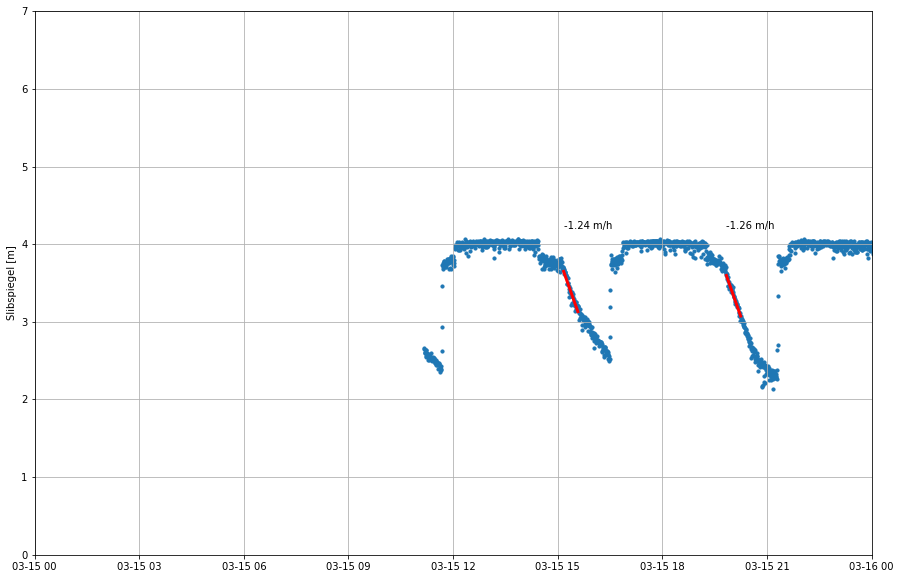

In [70]:
minus = '2021-03-15 00:00:00'
maxus = '2021-03-16 00:00:00'
mintijd = pd.to_datetime(minus)
maxtijd = pd.to_datetime(maxus)

fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(mintijd, maxtijd)
ax.set_ylim(0,7)
ax.set_ylabel("Slibspiegel [m]")
for key in slibspiegelmetingen:
    x = df_spiegel.loc[key[0]:key[1], "SH"].index
    y_pred = slibspiegelmetingen[key][2]
    plt.plot(x, y_pred, color='red', linewidth=3)
    snelheid = round(slibspiegelmetingen[key][0][0]*60,2)
    snelheid = str(snelheid) + " m/h"
    start = pd.to_datetime(slibspiegelmetingen[key][1])
    if mintijd <= start <= maxtijd:
        plt.text(start, 4.2, snelheid)

min_dag = minus[:10].replace("-","_")
plt.grid(which="major")
plotname = r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\Lineaire Regressie\%s"%min_dag
plt.savefig(plotname)


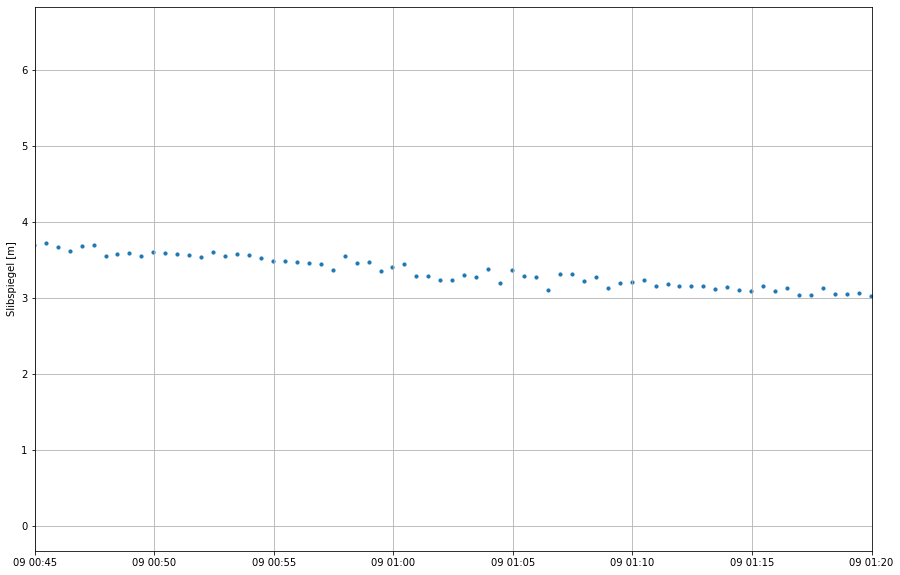

In [262]:
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2021-01-09 00:45:00'),pd.to_datetime('2021-01-09 01:20:00'))
ax.set_ylabel("Slibspiegel [m]")
plt.grid()
plt.show()

In [86]:
small_dict = {}
for key in slibspiegelmetingen:
    small_dict[key[0]] = -60*slibspiegelmetingen[key][0][0]

In [87]:
df = pd.DataFrame.from_dict(small_dict, orient="index")
df.columns = ["Slibspiegeldaalsnelheid"]

In [88]:
df.index = pd.to_datetime(df.index)

<AxesSubplot:>

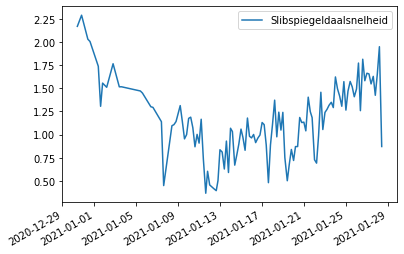

In [89]:
df.plot()

In [90]:
loc_325 = r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Data-analyse\Resultaten\25_01_2021\sensor_325\cyclussen_at1.xlsx"
loc_386 = r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Data-analyse\Resultaten\25_01_2021\sensor_325_386\cyclussen_at1.xlsx"

df_325 = pd.read_excel(loc_325)
df_386 = pd.read_excel(loc_386)

In [91]:
df_325.index =pd.to_datetime(df_325["Start_bezinken1"])
df_386.index =pd.to_datetime(df_386["Start_bezinken1"])


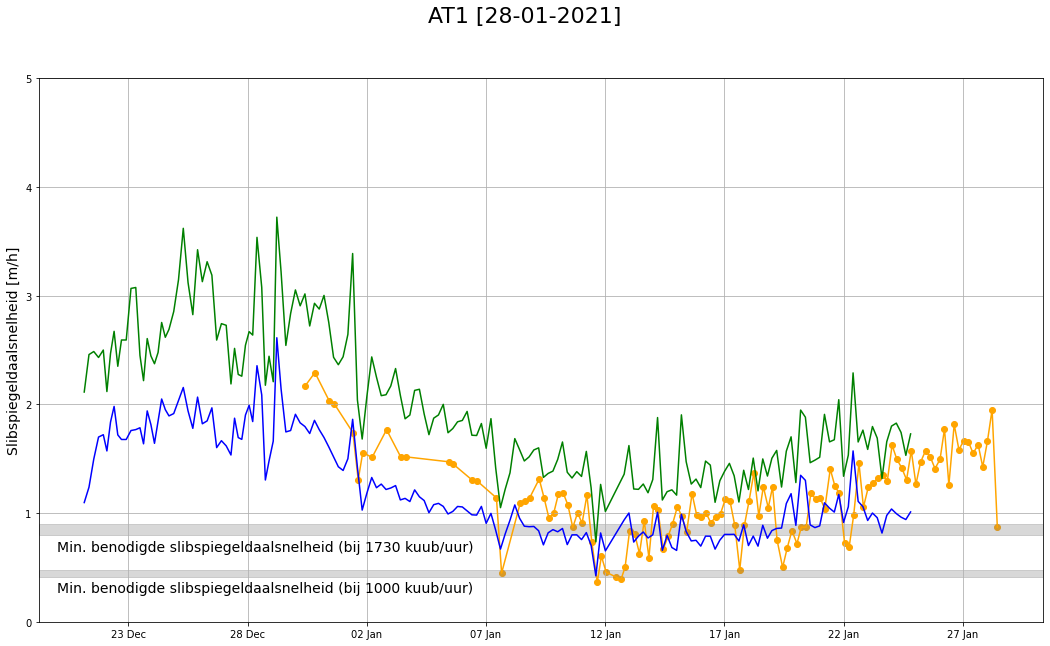

In [96]:
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals

fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle("AT1 [28-01-2021]",fontsize=22)
ax.set_ylabel("Slibspiegeldaalsnelheid [m/h]", fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
plt.grid(which='major', axis='both')
plt.scatter(df.index, df["Slibspiegeldaalsnelheid"], color="orange")
ax.set_ylim(0,5)
plt.plot(df.index, df["Slibspiegeldaalsnelheid"], color="orange")
plt.plot(df_325.loc["2020-12-21":"2021-01-25"].index, df_325.loc["2020-12-21":"2021-01-25", "Snelheid1"], color="green")
plt.plot(df_386.loc["2020-12-21":"2021-01-25"].index, df_386.loc["2020-12-21":"2021-01-25", "Snelheid1"], color="blue")
plt.axhspan(0.8,0.9, color="grey", alpha=0.3)
plt.axhspan(0.41,0.48, color="grey", alpha=0.3)
plt.text("2020-12-20",0.65,"Min. benodigde slibspiegeldaalsnelheid (bij 1730 kuub/uur)", fontsize=14)
plt.text("2020-12-20",0.27,"Min. benodigde slibspiegeldaalsnelheid (bij 1000 kuub/uur)", fontsize=14)
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\Samenvatting\AT1_Slibdekendaalsnelheid_28_01_2021")

In [ ]:
# Meetpunt 1
max_s = df_spiegel.loc["2020-12-21 03:46:00":"2020-12-21 04:12:00","SH"].max()
min_s = df_spiegel.loc["2020-12-21 03:46:00":"2020-12-21 04:12:00","SH"].min()
tijd_min = "03:46:00"
tijd_max = "04:12:00"
spiegelmetingen["2020-12-21 03:46:00"] = (max_s-min_s)/(26/60)

# Meetpunt 2
max_s = df_spiegel.loc["2020-12-21 13:45:00":"2020-12-21 14:00:00","SH"].max()
min_s = df_spiegel.loc["2020-12-21 13:45:00":"2020-12-21 14:00:00","SH"].min()
tijd_min = "13:45:00"
tijd_max = "14:00:00"
spiegelmetingen["2020-12-21 13:45:00"] = (max_s-min_s)/(15/60)

# Meetpunt 3
max_s = df_spiegel.loc["2020-12-21 18:48:00":"2020-12-21 19:05:00","SH"].max()
min_s = df_spiegel.loc["2020-12-21 18:48:00":"2020-12-21 19:05:00","SH"].min()
tijd_min = "18:48:00"
tijd_max = "19:05:00"
spiegelmetingen["2020-12-21 18:48:00"] = (max_s-min_s)/(17/60)

# Meetpunt 4
max_s = df_spiegel.loc["2020-12-21 23:20:00":"2020-12-21 23:40:00","SH"].max()
min_s = df_spiegel.loc["2020-12-21 23:20:00":"2020-12-21 23:40:00","SH"].min()
tijd_min = "23:20:00"
tijd_max = "23:40:00"
spiegelmetingen["2020-12-21 23:20:00"] = (max_s-min_s)/(20/60)

# Meetpunt 5
max_s = df_spiegel.loc["2020-12-22 03:23:00":"2020-12-22 03:45:00","SH"].max()
min_s = df_spiegel.loc["2020-12-22 03:23:00":"2020-12-22 03:45:00","SH"].min()
tijd_min = "03:23:00"
tijd_max = "03:45:00"
spiegelmetingen["2020-12-22 03:23:00"] = (max_s-min_s)/(22/60)

# Meetpunt 6
max_s = df_spiegel.loc["2020-12-22 07:00:00":"2020-12-22 07:20:00","SH"].max()
min_s = df_spiegel.loc["2020-12-22 07:00:00":"2020-12-22 07:20:00","SH"].min()
tijd_min = "07:00:00"
tijd_max = "07:20:00"
spiegelmetingen["2020-12-22 07:00:00"] = (max_s-min_s)/(20/60)

# 29 december 2020
#meetpunt 1
max_s = df_spiegel.loc["2020-12-24 17:29:00":"2020-12-24 17:53:00","SH"].max()
min_s = df_spiegel.loc["2020-12-24 17:29:00":"2020-12-24 17:53:00","SH"].min()
tijd_min = "17:29:00"
tijd_max = "17:53:00"
spiegelmetingen["2020-12-24 17:29:00"] = (max_s-min_s)/(24/60)

#meetpunt 2
max_s = df_spiegel.loc["2020-12-25 12:30:00":"2020-12-25 12:48:00","SH"].max()
min_s = df_spiegel.loc["2020-12-25 12:30:00":"2020-12-25 12:48:00","SH"].min()
tijd_min = "12:30:00"
tijd_max = "12:48:00"
spiegelmetingen["2020-12-25 12:30:00"] = (max_s-min_s)/(18/60)

#meetpunt 3
max_s = df_spiegel.loc["2020-12-26 17:23:00":"2020-12-26 17:43:00","SH"].max()
min_s = df_spiegel.loc["2020-12-26 17:23:00":"2020-12-26 17:43:00","SH"].min()
tijd_min = "17:23:00"
tijd_max = "17:43:00"
spiegelmetingen["2020-12-26 17:23:00"] = (max_s-min_s)/(20/60)

#meetpunt 4
max_s = df_spiegel.loc["2020-12-27 19:12:00":"2020-12-27 19:33:00","SH"].max()
min_s = df_spiegel.loc["2020-12-27 19:12:00":"2020-12-27 19:33:00","SH"].min()
tijd_min = "19:12:00"
tijd_max = "19:33:00"
spiegelmetingen["2020-12-27 19:12:00"] = (max_s-min_s)/(21/60)

# 4 januari 2020
#meetpunt 1a 28 dec
max_s = df_spiegel.loc["2020-12-28 05:47:00":"2020-12-28 06:14:00","SH"].max()
min_s = df_spiegel.loc["2020-12-28 05:47:00":"2020-12-28 06:14:00","SH"].min()
tijd_min = "05:47:00"
tijd_max = "06:14:00"
spiegelmetingen["2020-12-28 05:47:00"] = (max_s-min_s)/(27/60)

#meetpunt 1b 28 dec
max_s = df_spiegel.loc["2020-12-28 09:57:00":"2020-12-28 10:13:00","SH"].max()
min_s = df_spiegel.loc["2020-12-28 09:57:00":"2020-12-28 10:13:00","SH"].min()
tijd_min = "09:57:00"
tijd_max = "10:13:00"
spiegelmetingen["2020-12-28 09:57:00"] = (max_s-min_s)/(16/60)

#meetpunt 1c 28 dec
max_s = df_spiegel.loc["2020-12-28 22:04:00":"2020-12-28 22:25:00","SH"].max()
min_s = df_spiegel.loc["2020-12-28 22:04:00":"2020-12-28 22:25:00","SH"].min()
tijd_min = "22:04:00"
tijd_max = "22:25:00"
spiegelmetingen["2020-12-28 22:04:00"] = (max_s-min_s)/(21/60)

#meetpunt 2a 29 dec
max_s = df_spiegel.loc["2020-12-29 05:48:00":"2020-12-29 06:12:00","SH"].max()
min_s = df_spiegel.loc["2020-12-29 05:48:00":"2020-12-29 06:12:00","SH"].min()
tijd_min = "05:48:00"
tijd_max = "06:12:00"
spiegelmetingen["2020-12-29 05:48:00"] = (max_s-min_s)/(24/60)

#meetpunt 2b 29 dec
max_s = df_spiegel.loc["2020-12-29 10:08:00":"2020-12-29 10:31:00","SH"].max()
min_s = df_spiegel.loc["2020-12-29 10:08:00":"2020-12-29 10:31:00","SH"].min()
tijd_min = "10:08:00"
tijd_max = "10:31:00"
spiegelmetingen["2020-12-29 10:08:00"] = (max_s-min_s)/(23/60)

#meetpunt 2b 29 dec
max_s = df_spiegel.loc["2020-12-29 15:09:00":"2020-12-29 15:30:00","SH"].max()
min_s = df_spiegel.loc["2020-12-29 15:09:00":"2020-12-29 15:30:00","SH"].min()
tijd_min = "15:09:00"
tijd_max = "15:30:00"
spiegelmetingen["2020-12-29 15:09:00"] = (max_s-min_s)/(21/60)

#meetpunt 3a 30 dec
max_s = df_spiegel.loc["2020-12-30 10:08:00":"2020-12-30 10:26:00","SH"].max()
min_s = df_spiegel.loc["2020-12-30 10:08:00":"2020-12-30 10:26:00","SH"].min()
tijd_min = "10:08:00"
tijd_max = "10:26:00"
spiegelmetingen["2020-12-30 10:08:00"] = (max_s-min_s)/(18/60)

#meetpunt 3b 30 dec
max_s = df_spiegel.loc["2020-12-30 19:49:00":"2020-12-30 20:05:00","SH"].max()
min_s = df_spiegel.loc["2020-12-30 19:49:00":"2020-12-30 20:05:00","SH"].min()
tijd_min = "19:49:00"
tijd_max = "20:05:00"
spiegelmetingen["2020-12-30 19:49:00"] = (max_s-min_s)/(16/60)

#meetpunt 4a 31 dec
max_s = df_spiegel.loc["2020-12-31 10:10:00":"2020-12-31 10:31:00","SH"].max()
min_s = df_spiegel.loc["2020-12-31 10:10:00":"2020-12-31 10:31:00","SH"].min()
tijd_min = "10:10:00"
tijd_max = "10:31:00"
spiegelmetingen["2020-12-31 10:10:00"] = (max_s-min_s)/(21/60)

#meetpunt 4b 31 dec
max_s = df_spiegel.loc["2020-12-31 15:05:00":"2020-12-31 15:24:00","SH"].max()
min_s = df_spiegel.loc["2020-12-31 15:05:00":"2020-12-31 15:24:00","SH"].min()
tijd_min = "15:05:00"
tijd_max = "15:24:00"
spiegelmetingen["2020-12-31 15:05:00"] = (max_s-min_s)/(19/60)

#meetpunt 5a 1 jan
max_s = df_spiegel.loc["2021-01-01 10:04:00":"2021-01-01 10:24:00","SH"].max()
min_s = df_spiegel.loc["2021-01-01 10:04:00":"2021-01-01 10:24:00","SH"].min()
tijd_min = "10:04:00"
tijd_max = "10:24:00"
spiegelmetingen["2021-01-01 10:04:00"] = (max_s-min_s)/(20/60)

#meetpunt 5b 1 jan
max_s = df_spiegel.loc["2021-01-01 15:22:00":"2021-01-01 15:50:00","SH"].max()
min_s = df_spiegel.loc["2021-01-01 15:22:00":"2021-01-01 15:50:00","SH"].min()
tijd_min = "15:22:00"
tijd_max = "15:50:00"
spiegelmetingen["2021-01-01 15:22:00"] = (max_s-min_s)/(28/60)

#meetpunt 5c 1 jan
max_s = df_spiegel.loc["2021-01-01 19:56:00":"2021-01-01 20:21:00","SH"].max()
min_s = df_spiegel.loc["2021-01-01 19:56:00":"2021-01-01 20:21:00","SH"].min()
tijd_min = "19:56:00"
tijd_max = "20:21:00"
spiegelmetingen["2021-01-01 19:56:00"] = (max_s-min_s)/(25/60)

#meetpunt 6a 2 jan
max_s = df_spiegel.loc["2021-01-02 05:19:00":"2021-01-02 05:46:00","SH"].max()
min_s = df_spiegel.loc["2021-01-02 05:19:00":"2021-01-02 05:46:00","SH"].min()
tijd_min = "05:19:00"
tijd_max = "05:46:00"
spiegelmetingen["2021-01-02 05:19:00"] = (max_s-min_s)/(27/60)

#meetpunt 6b 2 jan
max_s = df_spiegel.loc["2021-01-02 19:55:00":"2021-01-02 20:16:00","SH"].max()
min_s = df_spiegel.loc["2021-01-02 19:55:00":"2021-01-02 20:16:00","SH"].min()
tijd_min = "19:55:00"
tijd_max = "20:16:00"
spiegelmetingen["2021-01-02 19:55:00"] = (max_s-min_s)/(21/60)

#meetpunt 6a 3 jan
max_s = df_spiegel.loc["2021-01-03 10:09:00":"2021-01-03 10:35:00","SH"].max()
min_s = df_spiegel.loc["2021-01-03 10:09:00":"2021-01-03 10:35:00","SH"].min()
tijd_min = "10:09:00"
tijd_max = "10:35:00"
spiegelmetingen["2021-01-03 10:09:00"] = (max_s-min_s)/(26/60)

#meetpunt 6b 3 jan
max_s = df_spiegel.loc["2021-01-03 15:15:00":"2021-01-03 15:33:00","SH"].max()
min_s = df_spiegel.loc["2021-01-03 15:15:00":"2021-01-03 15:33:00","SH"].min()
tijd_min = "15:15:00"
tijd_max = "15:33:00"
spiegelmetingen["2021-01-03 15:15:00"] = (max_s-min_s)/(18/60)

max_s = df_spiegel.loc["2021-01-05 10:21:00":"2021-01-05 10:48:00","SH"].max()
min_s = df_spiegel.loc["2021-01-05 10:21:00":"2021-01-05 10:48:00","SH"].min()
tijd_min = "10:21:00"
tijd_max = "10:48:00"
spiegelmetingen["2021-01-05 10:21:00"] = (max_s-min_s)/(27/60)

max_s = df_spiegel.loc["2021-01-05 15:06:00":"2021-01-05 15:33:00","SH"].max()
min_s = df_spiegel.loc["2021-01-05 15:06:00":"2021-01-05 15:33:00","SH"].min()
tijd_min = "15:06:00"
tijd_max = "15:33:00"
spiegelmetingen["2021-01-05 15:06:00"] = (max_s-min_s)/(27/60)

max_s = df_spiegel.loc["2021-01-06 10:21:00":"2021-01-06 10:49:00","SH"].max()
min_s = df_spiegel.loc["2021-01-06 10:21:00":"2021-01-06 10:49:00","SH"].min()
tijd_min = "10:21:00"
tijd_max = "10:49:00"
spiegelmetingen["2021-01-06 10:21:00"] = (max_s-min_s)/(28/60)

max_s = df_spiegel.loc["2021-01-06 15:10:00":"2021-01-06 15:37:00","SH"].max()
min_s = df_spiegel.loc["2021-01-06 15:10:00":"2021-01-06 15:37:00","SH"].min()
tijd_min = "15:10:00"
tijd_max = "15:37:00"
spiegelmetingen["2021-01-06 15:10:00"] = (max_s-min_s)/(27/60)

max_s = df_spiegel.loc["2021-01-07 10:31:00":"2021-01-07 10:59:00","SH"].max()
min_s = df_spiegel.loc["2021-01-07 10:31:00":"2021-01-07 10:59:00","SH"].min()
tijd_min = "10:31:00"
tijd_max = "10:59:00"
spiegelmetingen["2021-01-07 10:31:00"] = (max_s-min_s)/(28/60)

max_s = df_spiegel.loc["2021-01-07 15:42:00":"2021-01-07 16:30:00","SH"].max()
min_s = df_spiegel.loc["2021-01-07 15:42:00":"2021-01-07 16:30:00","SH"].min()
tijd_min = "15:42:00"
tijd_max = "16:30:00"
spiegelmetingen["2021-01-07 15:42:00"] = (max_s-min_s)/(48/60)

max_s = df_spiegel.loc["2021-01-08 10:33:00":"2021-01-08 11:03:00","SH"].max()
min_s = df_spiegel.loc["2021-01-08 10:33:00":"2021-01-08 11:03:00","SH"].min()
tijd_min = "10:33:00"
tijd_max = "11:03:00"
spiegelmetingen["2021-01-08 10:33:00"] = (max_s-min_s)/(30/60)

max_s = df_spiegel.loc["2021-01-08 15:17:00":"2021-01-08 15:48:00","SH"].max()
min_s = df_spiegel.loc["2021-01-08 15:17:00":"2021-01-08 15:48:00","SH"].min()
tijd_min = "15:17:00"
tijd_max = "15:48:00"
spiegelmetingen["2021-01-08 15:17:00"] = (max_s-min_s)/(31/60)

max_s = df_spiegel.loc["2021-01-08 20:00:00":"2021-01-08 20:37:00","SH"].max()
min_s = df_spiegel.loc["2021-01-08 20:00:00":"2021-01-08 20:37:00","SH"].min()
tijd_min = "20:00:00"
tijd_max = "20:37:00"
spiegelmetingen["2021-01-08 20:00:00"] = (max_s-min_s)/(37/60)

max_s = df_spiegel.loc["2021-01-09 10:25:00":"2021-01-09 10:56:00","SH"].max()
min_s = df_spiegel.loc["2021-01-09 10:25:00":"2021-01-09 10:56:00","SH"].min()
tijd_min = "10:25:00"
tijd_max = "10:56:00"
spiegelmetingen["2021-01-09 10:25:00"] = (max_s-min_s)/((56-25)/60)

max_s = df_spiegel.loc["2021-01-09 15:21:00":"2021-01-09 15:53:00","SH"].max()
min_s = df_spiegel.loc["2021-01-09 15:21:00":"2021-01-09 15:53:00","SH"].min()
tijd_min = "15:21:00"
tijd_max = "15:53:00"
spiegelmetingen["2021-01-09 10:25:00"] = (max_s-min_s)/((53-21)/60)

max_s = df_spiegel.loc["2021-01-09 20:20:00":"2021-01-09 20:42:00","SH"].max()
min_s = df_spiegel.loc["2021-01-09 20:20:00":"2021-01-09 20:42:00","SH"].min()
tijd_min = "15:20:00"
tijd_max = "15:42:00"
spiegelmetingen["2021-01-09 10:25:00"] = (max_s-min_s)/((42-20)/60)

max_s = df_spiegel.loc["2021-01-10 10:30:00":"2021-01-10 10:53:00","SH"].max()
min_s = df_spiegel.loc["2021-01-10 10:30:00":"2021-01-10 10:53:00","SH"].min()
tijd_min = "10:30:00"
tijd_max = "10:53:00"
spiegelmetingen["2021-01-10 10:30:00"] = (max_s-min_s)/((53-30)/60)

max_s = df_spiegel.loc["2021-01-10 15:20:00":"2021-01-10 15:56:00","SH"].max()
min_s = df_spiegel.loc["2021-01-10 15:20:00":"2021-01-10 15:56:00","SH"].min()
spiegelmetingen["2021-01-10 15:20:00"] = (max_s-min_s)/((56-20)/60)

max_s = df_spiegel.loc["2021-01-10 20:16:00":"2021-01-10 20:41:00","SH"].max()
min_s = df_spiegel.loc["2021-01-10 20:16:00":"2021-01-10 20:41:00","SH"].min()
spiegelmetingen["2021-01-10 20:16:00"] = (max_s-min_s)/((41-16)/60)

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
plt.scatter(df_spiegel.loc["2021-01-06":"2021-01-11"].index, df_spiegel.loc["2021-01-06":"2021-01-11", "SH"], s=5)
plt.ylabel("Slibspiegeldaalsnelheid [m/h]", fontsize="15")
ax.set_ylim(0,5)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
plt.grid(which='major')
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\Scatterplot6_tm_11jan2021_metuitschieters")

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
plt.scatter(df_zonder.loc["2021-01-06":"2021-01-11"].index, df_zonder.loc["2021-01-06":"2021-01-11", "SH"], s=5)
plt.ylabel("Slibspiegeldaalsnelheid [m/h]", fontsize="15")
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
plt.grid(which="major")
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\Scatterplot6_tm_11jan2021_zonderuitschieters")

In [ ]:
# Meetpunt 3 
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2020-12-21 17:30:00'),pd.to_datetime('2020-12-21 20:00:00'))
plt.axvline("2020-12-21 18:48:00", color="black")
plt.axvline("2020-12-21 19:05:00", color="black")
plt.axhline(3.86, color="green")
ax.set_ylabel("Slibspiegel [m]")
ax.set_ylim(-0.5,5)
plt.text("2020-12-21 18:25:00", 1.1, "window bezinksnelheid")
plt.text("2020-12-21 18:25:00", 0.9, 'Slibspiegel: %.2f m/h'%spiegelmetingen["2020-12-21 18:48:00"])
plt.grid()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\2020_12_21 18_48_00_sensor")
plt.show()

In [ ]:
# Meetpunt 1
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2020-12-21 03:00:00'),pd.to_datetime('2020-12-21 05:30:00'))
plt.axvline("2020-12-21 03:46:00", color="black")
plt.axvline("2020-12-21 04:12:00", color="black")
plt.axhline(3.25, color="green")
ax.set_ylabel("Slibspiegel [m]")
ax.set_ylim(-0.5,5)
plt.text("2020-12-21 03:50:00", 1.1, "window bezinksnelheid")
plt.text("2020-12-21 03:50:00", 0.9, 'Slibpsiegel: %.2f m/h'%spiegelmetingen["2020-12-21 03:46:00"])
plt.grid()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\2020_12_21 03_46_00_sensor")
plt.show()

In [ ]:
# Meetpunt 2
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2020-12-21 13:00:00'),pd.to_datetime('2020-12-21 15:00:00'))
plt.axvline("2020-12-21 13:45:00", color="black")
plt.axvline("2020-12-21 14:00:00", color="black")
plt.axhline(3.86, color="green")
ax.set_ylabel("Slibspiegel [m]")
ax.set_ylim(-0.5,5)
plt.text("2020-12-21 14:08:00", 1.1, "window bezinksnelheid")
plt.text("2020-12-21 14:08:00", 0.9, 'Slibspiegel: %.2f m/h'%spiegelmetingen["2020-12-21 13:45:00"])
plt.grid()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\2020_12_21 13_45_00_sensor")
plt.show()

In [ ]:
# Meetpunt 4
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2020-12-21 22:00:00'),pd.to_datetime('2020-12-22 01:00:00'))
plt.axvline("2020-12-21 23:20:00", color="black")
plt.axvline("2020-12-21 23:40:00", color="black")
plt.axhline(3.86, color="green")
ax.set_ylabel("Slibspiegel [m]")
ax.set_ylim(-0.5,5)
plt.text("2020-12-21 23:45:00", 1.1, "window bezinksnelheid")
plt.text("2020-12-21 23:45:00", 0.9, 'Slibspiegel: %.2f m/h'%spiegelmetingen["2020-12-21 23:20:00"])
plt.grid()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\2020_12_21 23_20_00_sensor")
plt.show()

In [ ]:
# Meetpunt 5
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2020-12-22 02:00:00'),pd.to_datetime('2020-12-22 05:00:00'))
plt.axvline("2020-12-22 03:23:00", color="black")
plt.axvline("2020-12-22 03:45:00", color="black")
plt.axhline(3.86, color="green")
ax.set_ylabel("Slibspiegel [m]")
ax.set_ylim(-0.5,5)
plt.text("2020-12-22 02:50:00", 1.1, "window bezinksnelheid")
plt.text("2020-12-22 02:50:00", 0.9, 'Slibspiegel: %.2f m/h'%spiegelmetingen["2020-12-22 03:23:00"])
plt.grid()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\2020_12_22 03_23_00_sensor")
plt.show()

In [ ]:
# Meetpunt 6
fig,ax =plt.subplots(figsize=(15,10))
plt.scatter(df_spiegel.index, df_spiegel["SH"], s=10)
ax.set_xlim(pd.to_datetime('2020-12-22 06:00:00'),pd.to_datetime('2020-12-22 08:00:00'))
plt.axvline("2020-12-22 07:00:00", color="black")
plt.axvline("2020-12-22 07:20:00", color="black")
plt.axhline(3.86, color="green")
ax.set_ylabel("Slibspiegel [m]")
ax.set_ylim(-0.5,5)
plt.text("2020-12-22 06:40:00", 1.1, "window bezinksnelheid")
plt.text("2020-12-22 06:40:00", 0.9, 'Slibspiegel: %.2f m/h'%spiegelmetingen["2020-12-22 07:00:00"])
plt.grid()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\Slibspiegelmeting\2020_12_22 07_00_00_sensor")
plt.show()